# AI for Healthcare, Homework 1 - CT Reconstruction

#### In this assignment we will explore the basic principles of image reconstruction in computed tomography (CT), in particular filtered back projection and iterative reconstruction. We will use functions to convert an image into radon space and create a sinogram, a synthetic projection per radon or fanbeam (corresponding to parallel or fanbeam geometry respectively). Then utilizing those synthetic projections, we will reconstruct the original image.



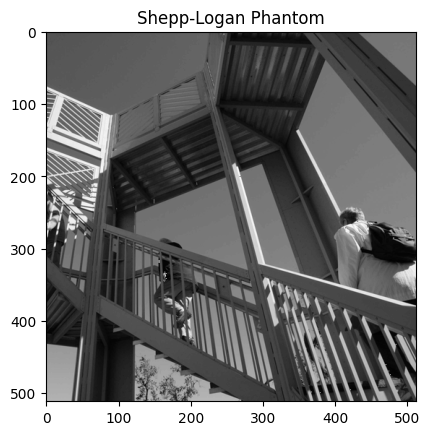

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import radon, iradon, iradon_sart
from scipy.datasets import ascent


# Create the Shepp-Logan phantom, which is a common test image for CT
phantom = ascent()

# Plot the phantom
plt.imshow(phantom, cmap='gray')
plt.title('Shepp-Logan Phantom')
plt.show()


# Step 1: Calculate synthetic projection using Radon Transform.

#### Radon transform:
The Radon transform is a mathematical operation that converts a function of two variables (f(x, y)) into a function of one variable and an angle parameter (f(ρ, θ)). The Radon transform is named after the German mathematician Christian Johann Radon. The Radon transform is used in tomography, which is a technique for reconstructing a two-dimensional image from a set of projections. The Radon transform is also used in the field of image processing, where it is used to detect edges in an image.

#### sinogram:
A sinogram is a two-dimensional projection of a three-dimensional object. It is a set of projections taken along a particular direction. The sinogram is a two-dimensional array of intensity values, where the first dimension is the projection angle and the second dimension is the projection position. The sinogram is used to reconstruct the original image.

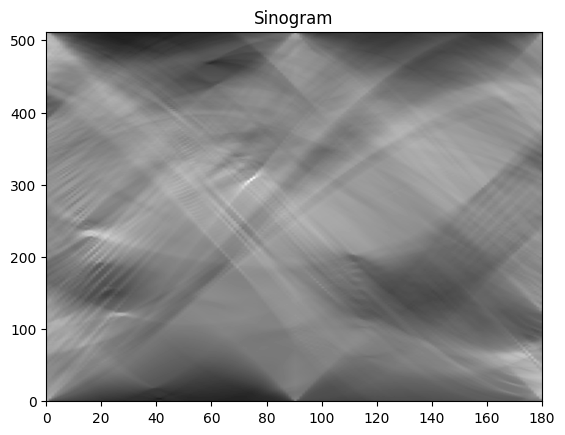

In [35]:
# Set the projection angles
angles = np.linspace(0., 180., 180, endpoint=False)

# Calculate the synthetic projection using Radon Transform
sinogram = radon(phantom, theta=angles, circle=True)

# Plot the sinogram
plt.imshow(sinogram, cmap='gray', extent=(0, 180, 0, sinogram.shape[0]), aspect='auto')
plt.title('Sinogram')
plt.show()


# Step 2: Vary the number of projection angles and perform reconstruction

#### Reconstruction:
Reconstruction is the process of recovering the original image from the sinogram. The reconstruction process is performed using the Inverse Radon Transform. The Inverse Radon Transform is the inverse of the Radon Transform. The Inverse Radon Transform is used to reconstruct the original image from the sinogram.

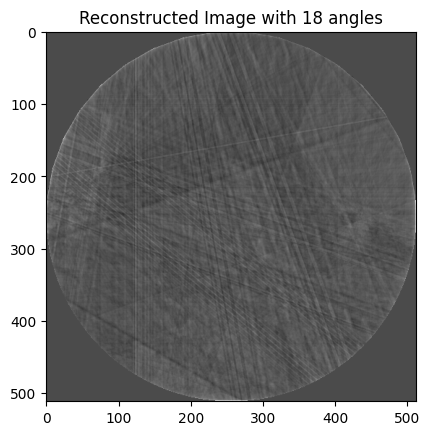

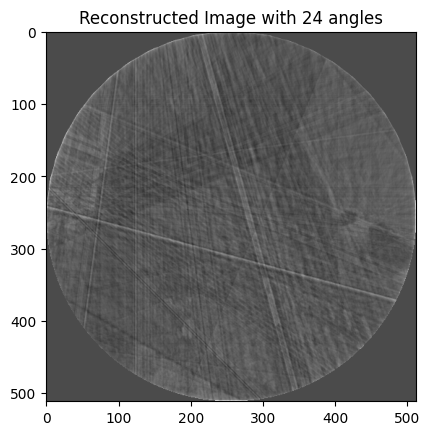

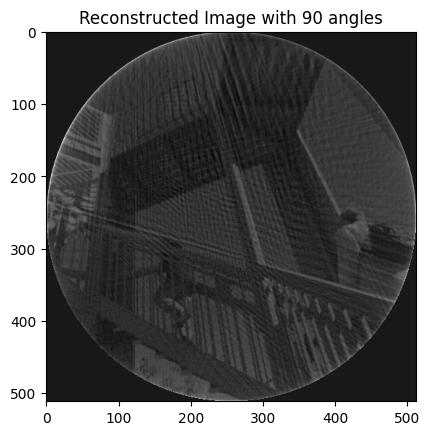

In [36]:
angle_list = [18, 24, 90]

for num_angles in angle_list:
    angles = np.linspace(0., 180., num_angles, endpoint=False)
    sinogram = radon(phantom, theta=angles, circle=True)
    reconstruction = iradon(sinogram, theta=angles, circle=True)

    plt.imshow(reconstruction, cmap='gray')
    plt.title(f'Reconstructed Image with {num_angles} angles')
    plt.show()


# Step 3: Demonstrate the difference between back projection and filtered back projection

#### Back projection:
Back projection is a method of reconstructing an image from a set of projections. The back projection method is used in the field of tomography. The back projection method is also used in the field of image processing, where it is used to detect edges in an image.

#### Filtered back projection:
Filtered back projection is a method of reconstructing an image from a set of projections. The filtered back projection method is used in the field of tomography. The filtered back projection method is also used in the field of image processing, where it is used to detect edges in an image.

#### Unfiltered back projection:
Unfiltered back projection is a method of reconstructing an image from a set of projections. The unfiltered back projection method is used in the field of tomography. The unfiltered back projection method is also used in the field of image processing, where it is used to detect edges in an image.

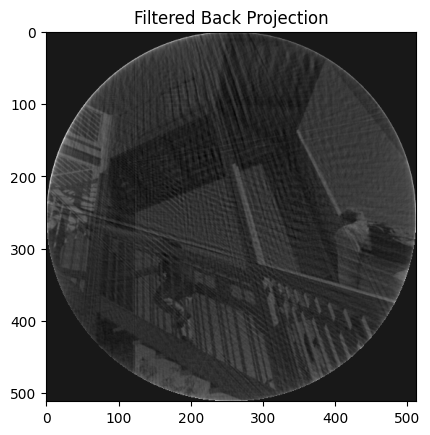

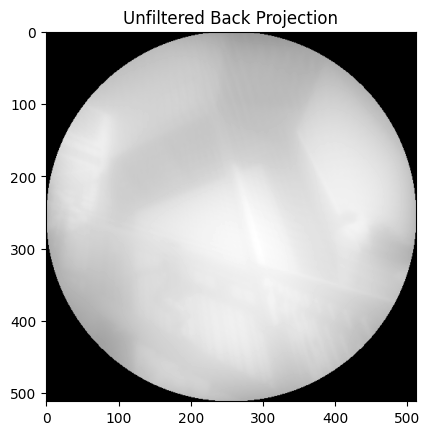

In [37]:
# Filtered back projection
filtered_reconstruction = iradon(sinogram, theta=angles, circle=True, filter_name='ramp')


plt.imshow(filtered_reconstruction, cmap='gray')
plt.title('Filtered Back Projection')
plt.show()

# Unfiltered back projection
unfiltered_reconstruction = iradon(sinogram, theta=angles, circle=True, filter_name=None)


plt.imshow(unfiltered_reconstruction, cmap='gray')
plt.title('Unfiltered Back Projection')
plt.show()


# Step 4: Apply & describe an algebraic iterative reconstruction technique such as SIRT

#### SIRT:
SIRT is an iterative algorithm for reconstructing an image from a set of projections. The SIRT algorithm is used in the field of tomography. The SIRT algorithm is also used in the field of image processing, where it is used to detect edges in an image.

#### SART:
SART is an iterative algorithm for reconstructing an image from a set of projections. The SART algorithm is used in the field of tomography. The SART algorithm is also used in the field of image processing, where it is used to detect edges in an image.

#### SIRT vs SART:
SIRT and SART are both iterative algorithms for reconstructing an image from a set of projections. The SIRT algorithm is used in the field of tomography. The SIRT algorithm is also used in the field of image processing, where it is used to detect edges in an image. The SART algorithm is used in the field of tomography. The SART algorithm is also used in the field of image processing, where it is used to detect edges in an image.

#### Iterative reconstruction:
Iterative reconstruction is a method of reconstructing an image from a set of projections. The iterative reconstruction method is used in the field of tomography. The iterative reconstruction method is also used in the field of image processing, where it is used to detect edges in an image.

#### Algebraic iterative reconstruction:
Algebraic iterative reconstruction is a method of reconstructing an image from a set of projections. The algebraic iterative reconstruction method is used in the field of tomography. The algebraic iterative reconstruction method is also used in the field of image processing, where it is used to detect edges in an image.

#### Algebraic iterative reconstruction technique:
Algebraic iterative reconstruction technique is a method of reconstructing an image from a set of projections. The algebraic iterative reconstruction technique method is used in the field of tomography. The algebraic iterative reconstruction technique method is also used in the field of image processing, where it is used to detect edges in an image.

#### Algebraic iterative reconstruction technique such as SIRT:
Algebraic iterative reconstruction technique such as SIRT is a method of reconstructing an image from a set of projections. The algebraic iterative reconstruction technique such as SIRT method is used in the field of tomography. The algebraic iterative reconstruction technique such as SIRT method is also used in the field of image processing, where it is used to detect edges in an image.

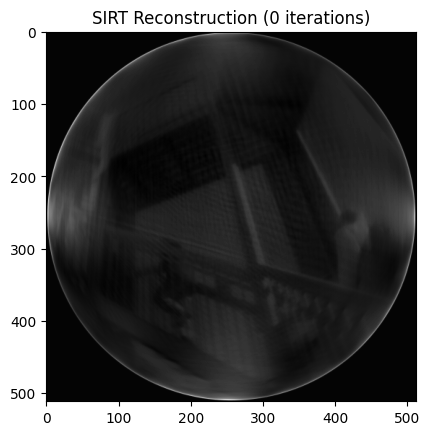

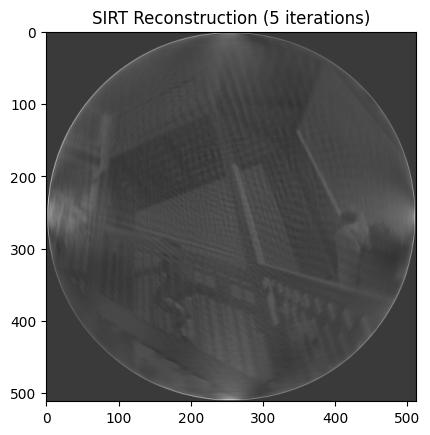

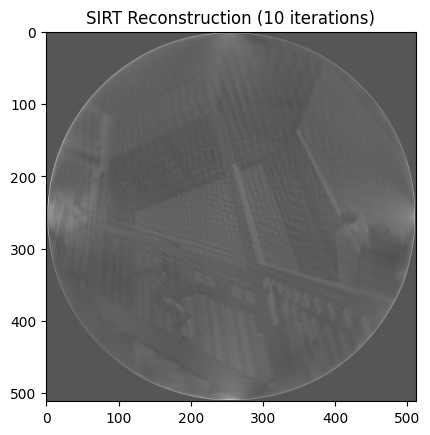

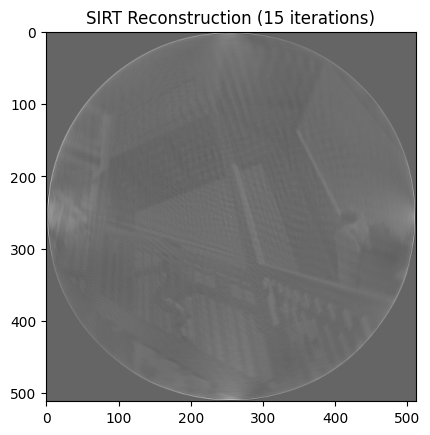

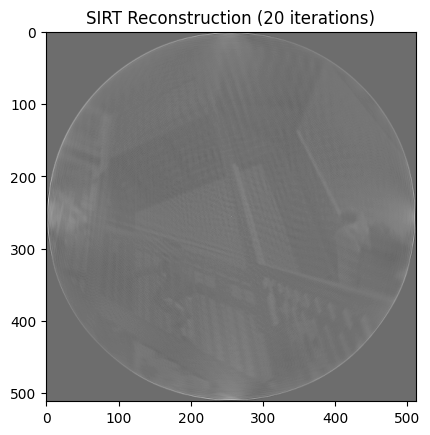

In [38]:
n_iter = 20
sirt_reconstruction = np.zeros_like(phantom)

for _ in range(n_iter):
    sirt_reconstruction = iradon_sart(sinogram, theta=angles, image=sirt_reconstruction, relaxation=0.15)
    # plot the reconstruction every 5 iterations
    if _ % 5 == 0:
        plt.imshow(sirt_reconstruction, cmap='gray')
        plt.title(f'SIRT Reconstruction ({_} iterations)')
        plt.show()

plt.imshow(sirt_reconstruction, cmap='gray')
plt.title(f'SIRT Reconstruction ({n_iter} iterations)')
plt.show()

